In [1]:
from skimage import feature
from skimage.util import img_as_ubyte
from skimage.color import rgb2gray
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!which python

/home/fur/local/anaconda3/envs/py36/bin/python


In [3]:
!pip install opencv-rolling-ball

     |████████████████████████████████| 49.4 MB 103 kB/s 
  Created wheel for opencv-rolling-ball: filename=opencv_rolling_ball-1.0.1-py3-none-any.whl size=6894 sha256=2df0d743b403cd0eead1c0826d68742dde2710abe11effea9d3fd50b991c390e
  Stored in directory: /home/fur/.cache/pip/wheels/e0/82/36/b4f5e554852cc4b51953a52d1898ea23755d566729f5fea31e
Successfully built opencv-rolling-ball


In [28]:
image_raw = cv2.imread('02_80-100s__crop256px_5_5.bmp')
image_gb3 = cv2.GaussianBlur(image_raw,(3,3), cv2.BORDER_DEFAULT)
image_gb5 = cv2.GaussianBlur(image_raw,(5,5), cv2.BORDER_DEFAULT)
image_gb7 = cv2.GaussianBlur(image_raw,(7,7), cv2.BORDER_DEFAULT)

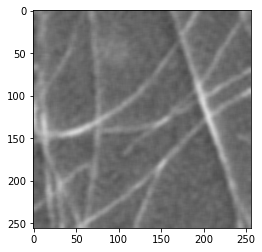

In [30]:
plt.imshow(image_gb7)
plt.show()

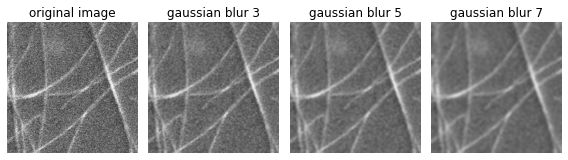

In [32]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1,
                                    ncols=4,
                                    figsize=(8, 2.5),
                                    sharex=True,
                                    sharey=True)
ax0.imshow(image_raw, cmap='jet')
ax0.set_title('original image')
ax0.axis('off')

ax1.imshow(image_gb3, vmin=image_gb3.min(), vmax=image_gb3.max(), cmap='jet')
ax1.set_title('gaussian blur 3')
ax1.axis('off')

ax2.imshow(image_gb5, vmin=image_gb5.min(), vmax=image_gb5.max(), cmap='jet')
ax2.set_title('gaussian blur 5')
ax2.axis('off')

ax3.imshow(image_gb7, vmin=image_gb7.min(), vmax=image_gb7.max(), cmap='jet')
ax3.set_title('gaussian blur 7')
ax3.axis('off')

fig.tight_layout()
fig.savefig('image-gaussian_blur.png')

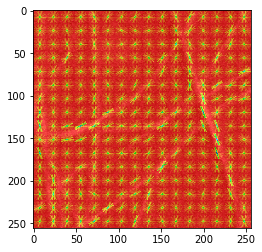

In [35]:
#hog feature
(hog, hog_image) = feature.hog(image_gb3, orientations=9, 
                    pixels_per_cell=(16, 16), cells_per_block=(16, 16), 
                    block_norm='L2-Hys', visualize=True, transform_sqrt=True)

plt.imshow(image_raw)
plt.imshow(hog_image,alpha=0.7, cmap='hsv')


plt.show()
#plt.imwrite('hog_gb.jpg', hog_image*255)

In [45]:
img_rgb = image_gb5

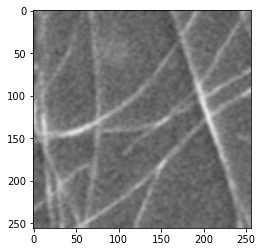

In [46]:
plt.imshow(img_rgb)
plt.show()

In [47]:
from cv2_rolling_ball import subtract_background_rolling_ball
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

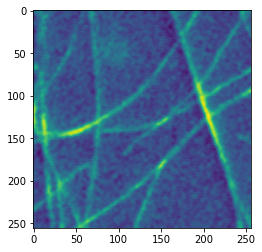

In [48]:
plt.imshow(img_gray)
plt.show()

In [49]:
img_subt = img_gray
img_subt, img_bkg = subtract_background_rolling_ball(img_subt,8, light_background=False, 
                                                    use_paraboloid=True, do_presmooth=True)

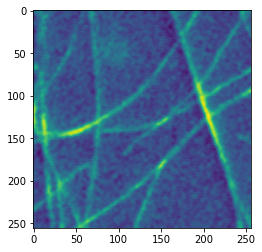

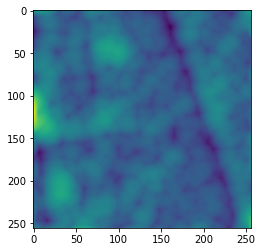

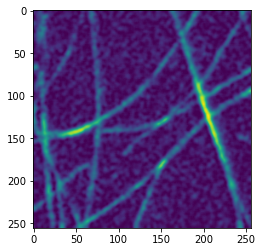

In [50]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)
plt.show()
plt.imshow(img_bkg)
plt.show()
plt.imshow(img_subt)
plt.show()

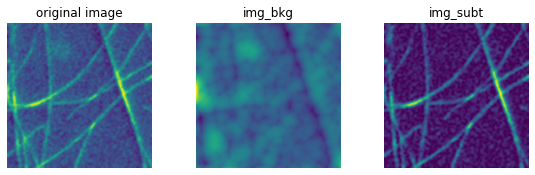

In [66]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,
                                    ncols=3,
                                    figsize=(8, 2.5),
                                    sharex=True,
                                    sharey=True)
ax0.imshow(img_gray)
ax0.set_title('original image')
ax0.axis('off')

ax1.imshow(img_bkg)
ax1.set_title('img_bkg')
ax1.axis('off')

ax2.imshow(img_subt)
ax2.set_title('img_subt')
ax2.axis('off')


fig.tight_layout()
fig.savefig('image-ball.png')

In [52]:
from scipy.ndimage import gaussian_filter
from skimage import data
from skimage import img_as_float
from skimage.morphology import reconstruction

In [53]:
# Convert to float: Important for subtraction later which won't work with uint8
image_f = img_as_float(image_raw)
image = gaussian_filter(image_f, 2.5)

seed = np.copy(image)
seed[1:-1, 1:-1] = image.min()
mask = image

dilated = reconstruction(seed, mask, method='dilation')

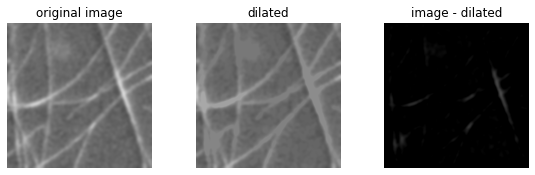

In [54]:
# filtering regional maxima
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,
                                    ncols=3,
                                    figsize=(8, 2.5),
                                    sharex=True,
                                    sharey=True)

ax0.imshow(image, cmap='gray')
ax0.set_title('original image')
ax0.axis('off')

ax1.imshow(dilated, vmin=image.min(), vmax=image.max(), cmap='gray')
#ax1.imshow(dilated,vmin=0,vmax=255,cmap='gray')
ax1.set_title('dilated')
ax1.axis('off')
subt=image-dilated
ax2.imshow(subt, cmap='jet')
ax2.set_title('image - dilated')
ax2.axis('off')

fig.tight_layout()
fig.savefig('image-dilated.png')

In [85]:
# Convert to float: Important for subtraction later which won't work with uint8
#img_ball = gaussian_filter(img_subt, 5)
img_ball = img_subt

seed = np.copy(img_ball)
seed[1:-1, 1:-1] = img_ball.min()
mask = img_ball

dilated_ball = reconstruction(seed, mask, method='dilation')

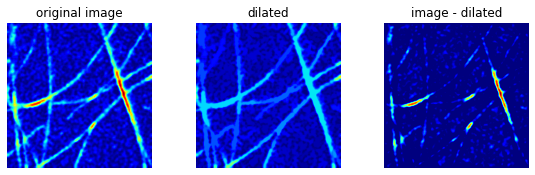

In [86]:
# filtering regional maxima for rolling-ball-subtracted image
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,
                                    ncols=3,
                                    figsize=(8, 2.5),
                                    sharex=True,
                                    sharey=True)

ax0.imshow(img_ball, cmap='jet')
ax0.set_title('original image')
ax0.axis('off')

ax1.imshow(dilated_ball, vmin=img_ball.min(), vmax=img_ball.max(), cmap='jet')
#ax1.imshow(dilated,vmin=0,vmax=255,cmap='gray')
ax1.set_title('dilated')
ax1.axis('off')

subtsubt=img_ball-dilated_ball
ax2.imshow(subtsubt, cmap='jet')
ax2.set_title('image - dilated')
ax2.axis('off')

fig.tight_layout()
fig.savefig('image-dilated_ball.png')

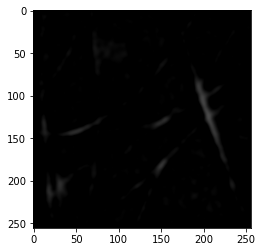

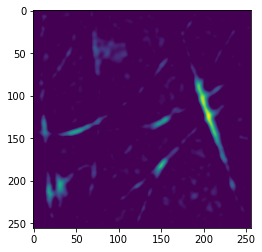

In [79]:
from skimage.color import rgb2gray
plt.imshow(subt)
plt.show()
subt_gray = rgb2gray(subt)
plt.imshow(subt_gray, vmin=subt_gray.min(), vmax=subt_gray.max())
plt.show()

In [56]:
subt.max()

0.2925757195908403

In [57]:
subt_ubyte = img_as_ubyte(subt)

In [58]:
subt_ubyte;

In [59]:
subt_ubyte.max()

75

In [60]:
type(subt_ubyte)

numpy.ndarray

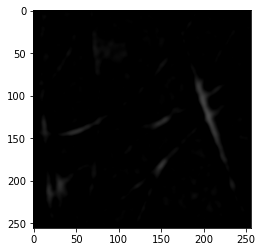

In [61]:
plt.imshow(subt_ubyte)
plt.show()

In [64]:
h = (image.max()-image.min())/2
seed = image - h
dilated = reconstruction(seed, mask, method='dilation')
hdome = image - dilated

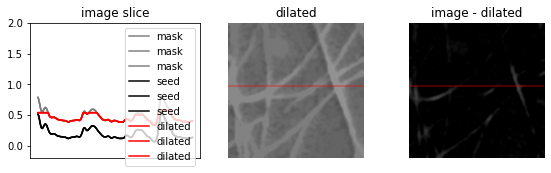

In [65]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(8, 2.5))
yslice = 120

ax0.plot(mask[yslice], '0.5', label='mask')
ax0.plot(seed[yslice], 'k', label='seed')
ax0.plot(dilated[yslice], 'r', label='dilated')
ax0.set_ylim(-0.2, 2)
ax0.set_title('image slice')
ax0.set_xticks([])
ax0.legend()

ax1.imshow(dilated, vmin=image.min(), vmax=image.max(), cmap='gray')
ax1.axhline(yslice, color='r', alpha=0.4)
ax1.set_title('dilated')
ax1.axis('off')

ax2.imshow(hdome, cmap='gray')
ax2.axhline(yslice, color='r', alpha=0.4)
ax2.set_title('image - dilated')
ax2.axis('off')

fig.tight_layout()
plt.show()